In [ ]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import random
text_data = []
with open('/content/drive/My Drive/Colab Notebooks/data/covid_aug.txt') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['SCREEN_NAME', 'SCREEN_NAME', 'SCREEN_NAME', 'SCREEN_NAME', 'SCREEN_NAME', 'SCREEN_NAME', 'SCREEN_NAME', 'hasuder', 'koronavirüs', 'postası', 'yayında']
['andalucía', 'aprueba', 'covid-19', 'tire', 'whole', 'farce', 'SCREEN_NAME', 'şehrimizin', 'farklı', 'noktasında', 'okullarda', 'çocuklarımıza']
['SCREEN_NAME', 'freibad', 'ticket', 'irrsinn', 'keiner', 'obwohl', 'einer', 'SCREEN_NAME', 'covid-19', 'update']
['morrem', 'pessoas', 'covid']
['rebajafiscal', 'ayudar', 'hacer', 'frente', 'crisis']
[]
[]
['order', 'begin', '“pandemia', 'spartiacque', 'ambizioni', 'mondo', 'potenza', 'asiatica', 'cambiato', 'strategia', 'parola', 'd’ordine', 'difendere', 'propri', 'interessi', 'azioni', 'propaganda', 'molto', 'aggressive', 'utilizzando', 'propri', 'ambasciatori', 'all’estero', 'estendere', 'propria', 'influenza', 'clarkson', 'senior', 'lecturer', 'sport', 'management', 'SCREEN_NAME', 'join', 'academic', 'researcher', 'culvin', 'keith', 'parry', 'stacey', 'share', 'recently', 'publish', 're

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [ ]:
import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.058*"SCREEN_NAME" + 0.024*"covid19" + 0.024*"montana" + 0.012*"covid-19" + 0.012*"would" + 0.012*"patient" + 0.012*"plasma" + 0.012*"efficacy" + 0.012*"analysis" + 0.012*"interest"')
(1, '0.086*"SCREEN_NAME" + 0.020*"covid" + 0.014*"covid-19" + 0.014*"pandemic" + 0.014*"already" + 0.014*"video" + 0.014*"nigerian" + 0.007*"56,757" + 0.007*"need" + 0.007*"never"')
(2, '0.146*"SCREEN_NAME" + 0.018*"government" + 0.018*"cartoonist" + 0.018*"central" + 0.018*"force" + 0.018*"amicoit" + 0.018*"heller" + 0.018*"politicalcartoons" + 0.018*"livin" + 0.018*"chiedo"')
(3, '0.003*"propri" + 0.003*"propria" + 0.003*"parry" + 0.003*"parola" + 0.003*"estendere" + 0.003*"clarkson" + 0.003*"cambiato" + 0.003*"lecturer" + 0.003*"all’estero" + 0.003*"influenza"')
(4, '0.020*"coronavirus" + 0.020*"sense" + 0.020*"commerce" + 0.020*"smartworking" + 0.020*"transformation" + 0.020*"lose" + 0.020*"digital" + 0.020*"dibattiti" + 0.020*"l’emergenza" + 0.020*"meeting"')
(5, '0.022*"SCREEN_NAME" + 0.022*"p

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=1113c6c09bc4e246f5097ff74f864055e10910615d33522fd41b19db0db1d19e
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model10.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
No:of words after removing punctuation and stopwords : 675229

['covid', 'coronavirus', 'en', 'pandemic', 'people', 'trump', 'corona', 'para', 'us']

The top 20 words and their frequency :

[('covid', 14482), ('coronavirus', 7145), ('en', 4587), ('pandemic', 3383), ('people', 2422), ('trump', 2230), ('corona', 2072), ('para', 1771), ('us', 1693)]


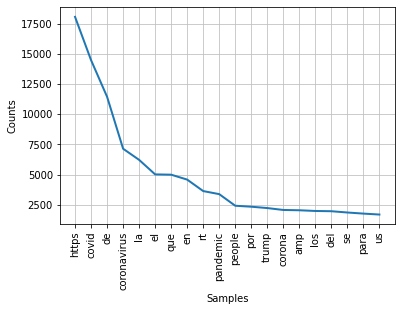

In [ ]:
import nltk
import numpy as np
import matplotlib
from nltk.corpus import stopwords
nltk.download('punkt')


def getTopWords(words,n):
    unique, counts = np.unique(words, return_counts=True)
    args = np.argsort(counts)[::-1]
    unique = unique[args]
    counts = counts[args]
    
    w=[]
    wc=[]
    topWords = []
    for i in range(n):
        word = unique[i]
        word_count = counts[i]
        if word not in ['https','de','la','el','que','rt','por','amp','los','del','se']:
          w.append(word)
          wc.append(word_count)
          topWords.append((word,word_count))
    print(w)
    print("")
    return topWords
    
def removePunct(words):
    cleanWords = []
    for word in words:
        word = word.lower()
        word = list(word)
        word = [l for l in word if 'a'<=l<='z']
        word = ''.join(word)
        cleanWords.append(word)
    return cleanWords


def removeStopWords(words):
    stop_words = set(stopwords.words('english'))
    stop_words = set([str(x) for x in stop_words])
    stop_words = list(stop_words)
    stop_words.append('')
    stop_words.append(' ')

    words = [word for word in words if word not in stop_words]
    words = list(words)
    return words

file_content = open("/content/drive/My Drive/Colab Notebooks/covid.txt").read()
tokens = nltk.word_tokenize(file_content)
a=removePunct(tokens)
b=removeStopWords(a)

j=len(b)
print("No:of words after removing punctuation and stopwords :",j) 
print("")

#print b

c=getTopWords(b,20)
print("The top 20 words and their frequency :")
print("")
print(c)

fd = nltk.FreqDist(b)
fd.plot(20,cumulative=False)

['https', 'covid', 'de', 'coronavirus', 'la', 'el', 'que', 'en', 'rt', 'pandemic', 'people', 'por', 'trump', 'corona', 'amp', 'los', 'del', 'se', 'para', 'us']


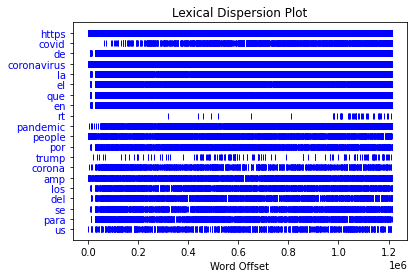

In [ ]:
import nltk
import numpy as np
import nltk.draw
from nltk.corpus import stopwords


def getTopWords(words,n):
    unique, counts = np.unique(words, return_counts=True)
    args = np.argsort(counts)[::-1]
    unique = unique[args]
    counts = counts[args]
    
    w=[]
    wc=[]
    topWords = []
    for i in range(n):
        word = unique[i]
        word_count = counts[i]
        w.append(word)
        wc.append(word_count)
        topWords.append((word,word_count))
    return w

to_plot = []
z=getTopWords(b,20)
print(z)
file_content = open("/content/drive/My Drive/Colab Notebooks/covid.txt").read()
tokens = nltk.word_tokenize(file_content)
mytext = nltk.Text(tokens)  
for word in z:
        to_plot.append(word)
        
mytext.dispersion_plot(to_plot)